<h1><center>Prodigy InfoTech</center></h1>
<h2><Center>TASK 2</Center></h2>
<h3><center>Submitted by: Ghaayathri Devi K</center></h3>
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Segmentation and Pattern Recognition

In [3]:
# File path
df = pd.read_csv('customer_segmentation.csv')

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [7]:
# Drop the unwanted features
df = df.drop(['Var_1', 'Segmentation'], axis=1)

In [8]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [9]:
# Check for the missing values
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [10]:
# Remove the missing values
df = df.dropna()

In [11]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [12]:
# Set to store outliers
outliers = set()

# Calculate z-score for age, worka-experience, family-size
scores = pd.DataFrame(columns = ['ID','Age', 'Work_Experience', 'Family_Size'])
scores['ID'] = df['ID']
for var in ['Age', 'Work_Experience', 'Family_Size']:
  scores[var] = np.abs(stats.zscore(df[var]))

scores


,ID,Age,Work_Experience,Family_Size
0,462809,1.303562,0.478692,0.760391
2,466315,1.421748,0.478692,1.209140
3,461735,1.421748,0.772431,0.552630
5,461319,0.755561,0.772431,0.552630
6,460156,0.697937,0.478692,0.103881
...,...,...,...,...
8062,463002,0.152876,0.772431,1.416901
8064,464685,0.516250,0.108786,0.760391
8065,465406,0.637375,0.478692,1.209140
8066,467299,1.000750,0.478692,0.760391


In [13]:
# Identify and remove outliers

for i, row in scores.iterrows():
  if np.max(row[['Age','Work_Experience','Family_Size']]) > 3:
        outliers.add(row['ID'])
df = df[df['ID'].isin(outliers)==False]

In [14]:
# keep a copy of this dataset for future visualization
df_viz = df.copy(deep=True)

In [16]:
# encode categorical variables
le = LabelEncoder()
cat_var = ['Gender','Ever_Married','Graduated','Spending_Score']
for var in cat_var:
    df[var] = le.fit_transform(df[var])
df= pd.concat([df, pd.get_dummies(df['Profession'])], axis=1)
df = df.drop('Profession', axis=1)

In [17]:
# Normalization and performing principal component analysis (PCA)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [18]:
# normalize daa with MinMaxScaler
mms = MinMaxScaler()
X = df.drop('ID', axis=1)
X_mms = mms.fit_transform(X)

# reduce dimensionality with PCA
print('Number of features before PCA: {}'.format(len(X_mms[0])))
pca = PCA(.90)
X_pca = pca.fit_transform(X_mms)
print('Number of features after PCA: {}'.format(len(X_pca[0])))

Number of features before PCA: 16
Number of features after PCA: 10


In [23]:
# Building the clustering model

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [24]:
# create a kmeans model
model = KMeans(random_state=42)

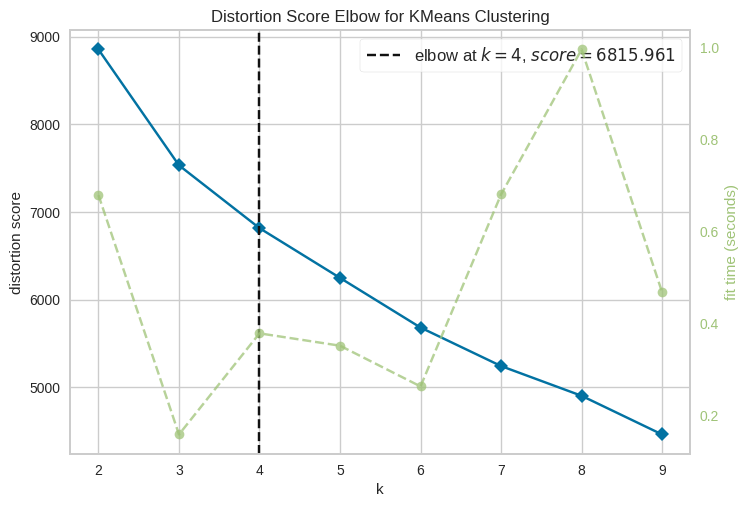

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# use the KElbowVisualizer to calculate distortion for different numbers of clusters
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_pca)
visualizer.show()

In [25]:
# create a k-means model and assign each customer to a cluster
kmeans = KMeans(n_clusters=4, random_state=42)
prediction = kmeans.fit_predict(X_pca)

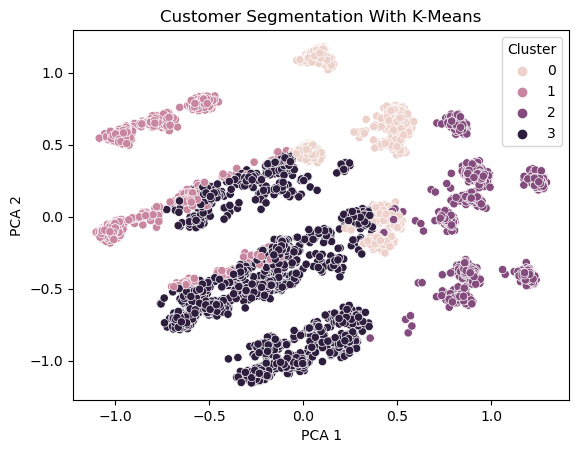

In [26]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# first PCA component
pca1 = [val[0] for val in X_pca]
# second PCA component
pca2 = [val[1] for val in X_pca]

# add the cluster and PCA components to the dataframe
df_viz['Cluster'] = prediction
df_viz['PCA 1'] = pca1
df_viz['PCA 2'] = pca2

# plot scatter plot
sns.scatterplot(data=df_viz, x='PCA 1', y='PCA 2', hue='Cluster')
plt.title('Customer Segmentation With K-Means')
plt.show()

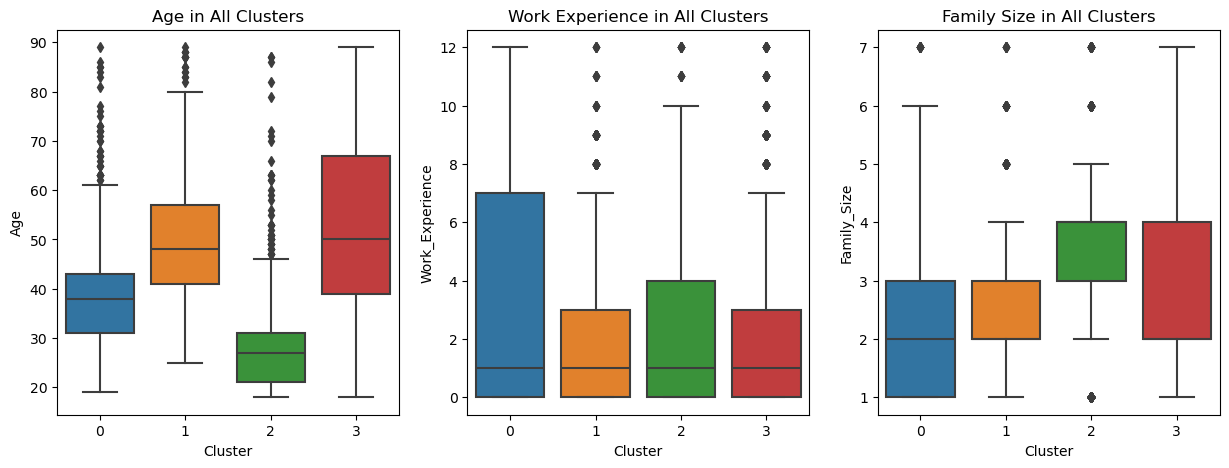

In [27]:
# Interpretation

# Create boxplots to show age, work experience, and family size for each cluster
fig, axes = plt.subplots(1, 3, figsize=(15,5))
ax = sns.boxplot(ax=axes[0], x="Cluster", y="Age", data=df_viz)
ax.title.set_text('Age in All Clusters')
ax2 = sns.boxplot(ax=axes[1], x="Cluster", y="Work_Experience", data=df_viz)
ax2.title.set_text('Work Experience in All Clusters')
ax3 = sns.boxplot(ax=axes[2], x="Cluster", y="Family_Size", data=df_viz)
ax3.title.set_text('Family Size in All Clusters')
plt.show()

In [28]:
# create a function to generate pie charts for a given categorical feature
def cluster_demographic(var):

    # Create subsets for each cluster
    df_0 = df_viz[df_viz['Cluster']==0]
    df_1 = df_viz[df_viz['Cluster']==1]
    df_2 = df_viz[df_viz['Cluster']==2]
    df_3 = df_viz[df_viz['Cluster']==3]

    fig, ax = plt.subplots(2, 2)


    ax[0,0].pie(df_0[var].value_counts(), labels=df_0[var].value_counts().index)
    ax[0,0].title.set_text('Cluster 0')
    ax[0,1].pie(df_1[var].value_counts(), labels=df_1[var].value_counts().index)
    ax[0,1].title.set_text('Cluster 1')
    ax[1,0].pie(df_2[var].value_counts(), labels=df_2[var].value_counts().index)
    ax[1,0].title.set_text('Cluster 2')
    ax[1,1].pie(df_3[var].value_counts(), labels=df_3[var].value_counts().index)
    ax[1,1].title.set_text('Cluster 3')
    plt.suptitle(var)

    plt.show()

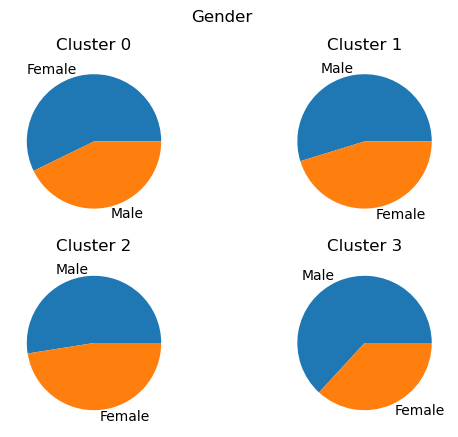

In [29]:
# Comparing clusters based on gender
cluster_demographic('Gender')

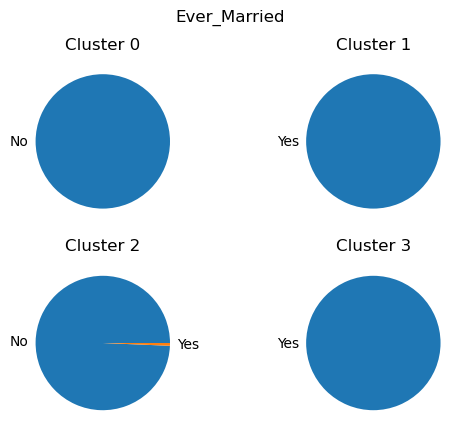

In [30]:
# Comparing clusters based on marital status
cluster_demographic('Ever_Married')

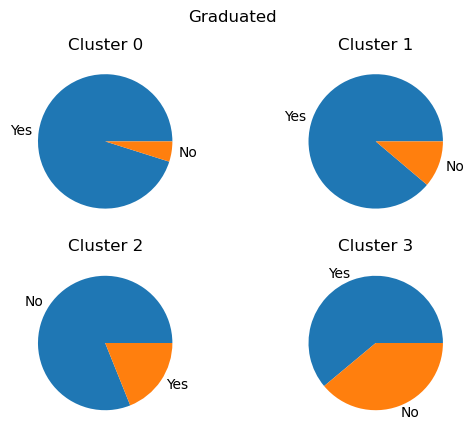

In [31]:
# Comparing clusters based on graduation status
cluster_demographic('Graduated')

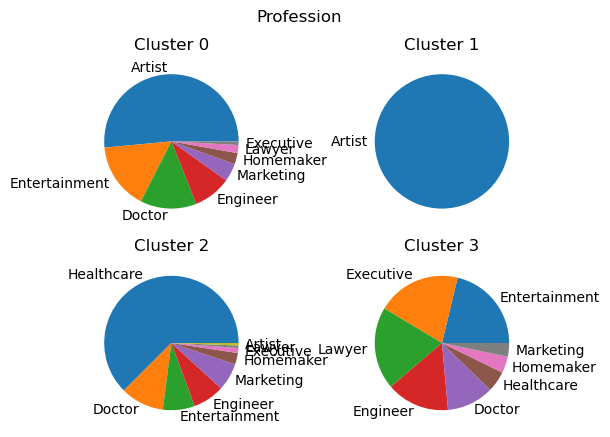

In [32]:
# Comparing clusters based on profession
cluster_demographic('Profession')

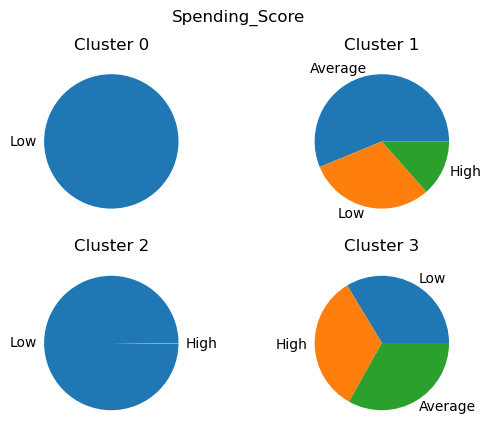

In [33]:
# Comparing clusters based on spending score
cluster_demographic('Spending_Score')

Based on the visual charts, the consumer population is mainly segmented by age, marital status, profession, and purchasing power.

We can now identify the defining traits of each cluster.

*   **Cluster 0:** Single people from the arts and entertainment sectors with low purchasing power.
*   **Cluster 1:** Middle-aged, married people in the arts sector with average purchasing power.
*   **Cluster 2:** Young, single people without higher education and with low purchasing power.
*   **Cluster 3:** Older, married people with well-paying jobs and a high purchasing power.










